In [105]:
#Import packge

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules

In [79]:
#Import Data

df = pd.read_csv("/content/bread basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [80]:
#Missing Data

df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [81]:
#Checking the kind of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


#### **Exploratory Analysis**

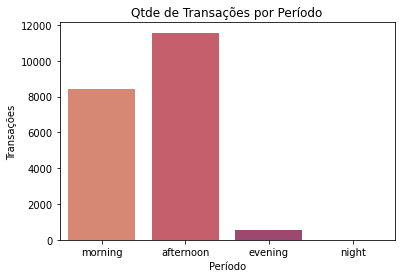

In [82]:
#Transaction by period

ax = sns.countplot(data=df, x="period_day", palette='flare')
ax.set_title("Qtde de Transações por Período")
ax.set_ylabel("Transações")
ax.set_xlabel("Período")


plt.show()

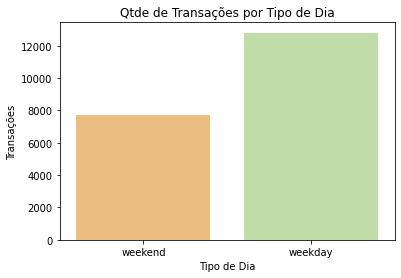

In [83]:
#Transaction by kind of day

ax2 = sns.countplot(data=df, x='weekday_weekend', palette='Spectral')
ax2.set_title("Qtde de Transações por Tipo de Dia")
ax2.set_ylabel("Transações")
ax2.set_xlabel("Tipo de Dia")


plt.show()

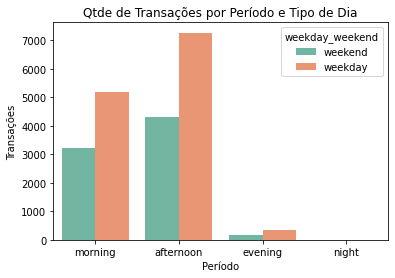

In [84]:
#Transaction by period and kind of day

ax3 = sns.countplot(data=df, x='period_day', hue='weekday_weekend', palette='Set2')
ax3.set_title('Qtde de Transações por Período e Tipo de Dia')
ax3.set_ylabel("Transações")
ax3.set_xlabel("Período")

plt.show()

In [85]:
#changing the type of Date_time column to datetime

df['date_time'] = pd.to_datetime(df['date_time'])

#Creating hour column 

for i in df['date_time']:
    df['Time'] = i.time()
    df['Date'] = i.date()

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,Time,Date
0,1,Bread,2016-10-30 09:58:00,morning,weekend,15:04:00,2017-09-04
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,15:04:00,2017-09-04
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,15:04:00,2017-09-04
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,15:04:00,2017-09-04
4,3,Jam,2016-10-30 10:07:00,morning,weekend,15:04:00,2017-09-04


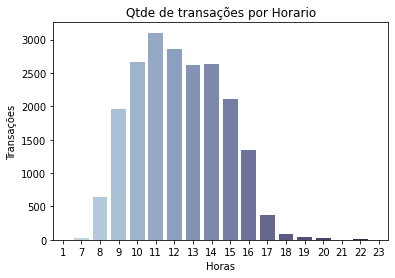

In [93]:
#Transaction by hour

df['hora'] = df['date_time'].dt.hour

ax4 = sns.countplot(data=df, x='hora', palette='ch:s=.25,rot=-.25')
ax4.set_title("Qtde de transações por Horario")
ax4.set_xlabel('Horas')
ax4.set_ylabel('Transações')

plt.show()

#### **Data Processing**

In [103]:
#Transforming the table

def encoder(x):
    if x <= 0:
        return 0
    elif x>= 1:
        return 1


df_v2 = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='Qtde')
df_bask = df_v2.pivot_table(index='Transaction', columns='Item', values='Qtde', aggfunc='sum').fillna(0)
df_bask_final = df_bask.applymap(encoder)

df_bask_final.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Applying the Model**

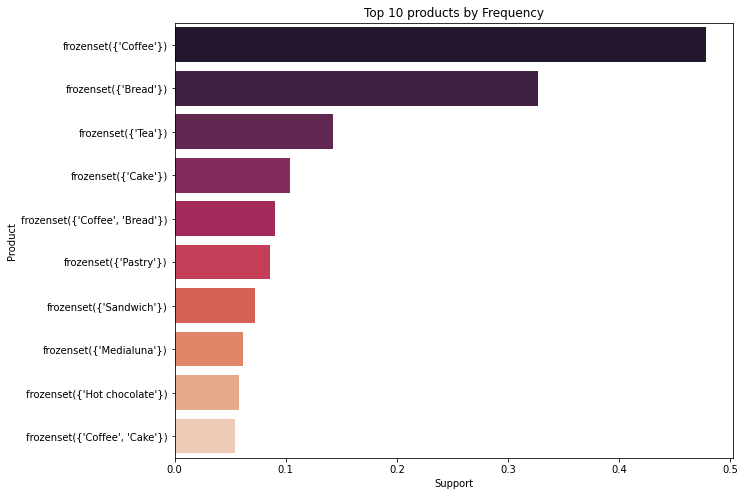

In [122]:
df_apr = apriori(df_bask_final, min_support=0.01, use_colnames=True).sort_values(by='support', ascending=False)

# Top 10 products by frequency of purchase

fig, ax5 = plt.subplots(figsize=(10,8))
ax5 = sns.barplot(data=df_apr[:10], x='support', y='itemsets', palette='rocket')
ax5.set_title("Top 10 products by Frequency")
ax5.set_xlabel("Support")
ax5.set_ylabel("Product")

plt.show()

In [124]:
#Applying the association rule

df_assR = association_rules(df_apr, metric='lift', min_threshold=0.01).sort_values(by='lift', ascending=False)
df_assR.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
72,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
69,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
49,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
48,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
21,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
